In [270]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing rounds2.csv file using read_csv(),

rounds2=pd.read_csv(r"C:\\Users\\Priyanka\\Downloads\\Anil\\Machine Learning and NLP Python documents\\Statistics and Machine Learning\\Module4_Investment_assignment\\rounds2.csv",
                    encoding='ISO-8859-1')
rounds2.head()
#rounds2[rounds2.duplicated(subset=['company_permalink','funding_round_type','funding_round_code','funded_at','raised_amount_usd'],keep=False)].sort_values(by=['company_permalink'])

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [271]:
#Getting to Know the data in rounds2.csv
print(rounds2.columns)
print(rounds2.shape)
print(rounds2.info())

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')
(114949, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None


In [272]:
#Identifying missing values in rounds2.csv
rounds2.isnull().sum() #Column wise

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [273]:
#Check if any row contains all null values
rounds2.isnull().all(axis=1).sum()

0

In [274]:
#Unique companies in rounds2.csv before cleaning
rounds2['company_permalink'].nunique()

90247

In [275]:
#Conversion of company_permalink to lowercase as it is the common column for merge
rounds2.company_permalink=rounds2['company_permalink'].str.lower() 
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [276]:
#unique company count after cleaning
rounds2['company_permalink'].nunique()

66370

In [277]:
#importing  companies.txt file using read_csv(), 
#seperator/delimiter is a tab for txt file, 

companies=pd.read_csv(r"C:\\Users\\Priyanka\\Downloads\\Anil\\Machine Learning and NLP Python documents\\Statistics and Machine Learning\\Module4_Investment_assignment\\companies.txt",
                      sep="\t", encoding = "ISO-8859-1", escapechar=None)

#Getting to Know the data in rounds2.csv
print(companies.columns)
print(companies.shape)
print(companies.info())
print(companies['permalink'].nunique())

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')
(66368, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
None
66368


In [278]:
#converting the values in permalink column to lower string to get the unique company count
companies.permalink=companies['permalink'].str.lower()
print(companies['permalink'].nunique())

66368


In [279]:
companies.status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [280]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [281]:
#Merge companies and rounds2 on permalink to create master_frame
master_frame=pd.merge(rounds2,companies,how='inner',left_on=['company_permalink'],right_on=['permalink'])
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [282]:
#Getting to know the master_frame data
print(master_frame.columns)
print(master_frame.shape)
print(master_frame['permalink'].nunique())
print(master_frame['company_permalink'].nunique())

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],
      dtype='object')
(114942, 16)
66363
66363


In [283]:
#Companies in rounds2 not present in companies
list((set(companies['permalink'])).difference(set(rounds2['company_permalink'])))

['/organization/energystone-games-ç\x81µçÿ³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§\x9fè½¦',
 '/organization/tipcat-interactive-æ²\x99è\x88\x9fä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/e-cã\x9abica',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x9a\x80']

In [284]:
rounds2[rounds2['company_permalink'].str.contains(r'magnet-tech(?!$)')]
rounds2[rounds2['company_permalink'].str.contains(r'weiche(?!$)')]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
109968,/organization/weiche-tech-åè½¦ç§æ,/funding-round/27b0cd2e0b75cbceb717343ea86c2c28,angel,NaN,16-06-2014,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN


In [285]:
#Finding missing values in master_frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [286]:
#percentage of missing values is master_frame
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [287]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [288]:
print(master_frame['funding_round_code'].isnull().sum())
print(master_frame['raised_amount_usd'].isnull().sum())
print(master_frame['founded_at'].isnull().sum())

83803
19984
20520


In [289]:
#Cleaning master_frame 
#drop funcding_round_code column due to high percentage of null values
#remove rows with null values for raised_amount_usd

master_frame=master_frame.drop('funding_round_code',axis=1)
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [290]:
#Imputing the missing values in founded_at column with a value
master_frame.loc[:,'founded_at']=master_frame['founded_at'].fillna('00-00-0000')

#missing value imputation for the rest of the column with blanks string
master_frame.loc[:,'category_list']=master_frame['category_list'].fillna('blanks')
master_frame.loc[:,'state_code']=master_frame['state_code'].fillna('blanks')
master_frame.loc[:,'country_code']=master_frame['country_code'].fillna('blanks')
master_frame.loc[:,'region']=master_frame['region'].fillna('blanks')
master_frame.loc[:,'city']=master_frame['city'].fillna('blanks')
master_frame.loc[:,'homepage_url']=master_frame['homepage_url'].fillna('blanks')

master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,00-00-0000
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,blanks,blanks,blanks,blanks,00-00-0000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,blanks,Hong Kong,Hong Kong,00-00-0000


In [291]:
#Filtering the data related to the four funding types 
funding_round_type_filter=master_frame[master_frame['funding_round_type'].isin(["seed","angel","venture","private_equity"])]
funding_round_type_filter.head()

#Grouping the data for the four funding types to find the most representative investment type
funding_amount=funding_round_type_filter.groupby('funding_round_type')
expo=funding_amount.describe()
expo.to_excel("output.xlsx")

Text(0.5, 1.0, 'Total investments for FT')

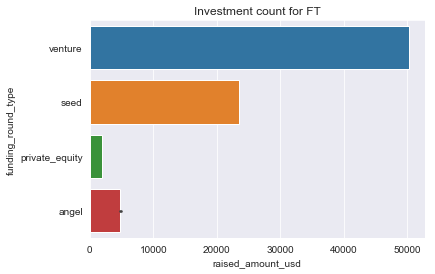

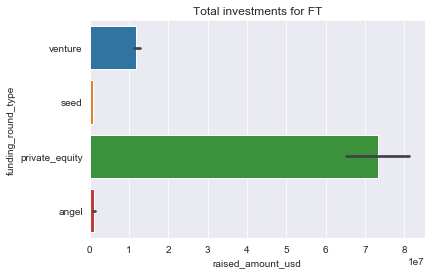

In [292]:
#img=funding_round_type_plot.plot.barh().get_figure()
#img2=funding_round_type_sum_plot.plot.barh().get_figure()

import seaborn as sns
sns.set_style("darkgrid")

#subplot 1: statistic=mean
plt.figure(1)
plt.subplot(1, 1, 1)
sns.barplot(x='raised_amount_usd', y='funding_round_type', data=funding_round_type_filter, estimator=np.count_nonzero, )
plt.title("Investment count for FT")

#subplot 2: statistic=median
plt.figure(2)
plt.subplot(1, 1, 1)
sns.barplot(x='raised_amount_usd', y='funding_round_type', data=funding_round_type_filter, estimator=np.mean, )
plt.title("Total investments for FT")


In [293]:
#Venture is the most suitable investment inferred from the above result 
#as the number of investments are more and also it fits in the range of 5-15 million.

#Grouping data for plotting the above four FT to represent venture as the suitable FT 
#Total number of investment
funding_round_type_sum_plot=funding_round_type_filter.pivot_table(values = 'raised_amount_usd', 
                      index = 'funding_round_type', 
                      #columns = 'funding_round_type', 
                      aggfunc = ('mean')).sort_values('raised_amount_usd', ascending=False)

#Average investment
funding_round_type_plot=funding_round_type_filter.pivot_table(values = 'raised_amount_usd', 
                      index = 'funding_round_type', 
                      #columns = 'funding_round_type', 
                      aggfunc = ('count')).sort_values('raised_amount_usd', ascending=False)


print(funding_round_type_sum_plot)
print(funding_round_type_plot)

                    raised_amount_usd
funding_round_type                   
private_equity           7.330859e+07
venture                  1.174895e+07
angel                    9.586945e+05
seed                     7.197796e+05
                    raised_amount_usd
funding_round_type                   
venture                         50228
seed                            23602
angel                            4860
private_equity                   1936


In [294]:
funding_round_type_filter.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,00-00-0000
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,blanks,blanks,blanks,blanks,00-00-0000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [295]:
#Further filtering data to contain only data related to venture FT
master_frame_venture=funding_round_type_filter[(funding_round_type_filter.funding_round_type =='venture')]
master_frame_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,00-00-0000
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,blanks,blanks,blanks,blanks,00-00-0000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [296]:
#Grouping master_frame data on funding_round_type column to get the mean/avg values for investment
master_frame_venture.raised_amount_usd.describe()

count    5.022800e+04
mean     1.174895e+07
std      8.635207e+07
min      0.000000e+00
25%      1.600902e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [297]:
#Top 9 countries with total funding ordered by the highest funding across all sector
top9_allsector=funding_round_type_filter.pivot_table(values = 'raised_amount_usd', 
                      index = 'country_code', 
                      #columns = 'funding_round_type', 
                      aggfunc = 'sum').sort_values('raised_amount_usd', ascending=False).head(9)
top9_allsector

,raised_amount_usd
country_code,
USA,5.112685e+11
CHN,6.149742e+10
blanks,3.381666e+10
GBR,2.716755e+10
IND,2.133162e+10
CAN,1.327111e+10
DEU,8.627355e+09
ISR,8.156387e+09
FRA,8.114600e+09


              raised_amount_usd
country_code                   
USA                4.225108e+11
CHN                3.983542e+10
blanks             2.550611e+10
GBR                2.024563e+10
IND                1.439186e+10
CAN                9.583332e+09
FRA                7.259537e+09
ISR                6.907515e+09
DEU                6.346960e+09


Text(0.5, 1.0, 'Top 9 countries Vs Venture investments')

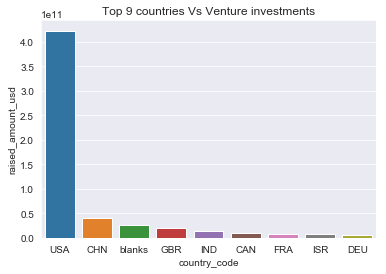

In [298]:
#Top 9 countries with total funding ordered by the highest funding for venture investment type
top9=master_frame_venture.pivot_table(values = 'raised_amount_usd', 
                      index = 'country_code', 
                      #columns = 'funding_round_type', 
                      aggfunc = 'sum').sort_values('raised_amount_usd', ascending=False).head(9)
print(top9)
top9.to_excel("output.xlsx")

#Bar plot to show the top 9 countries Vs total investment for venture investment
sns.barplot(x=top9.index, y="raised_amount_usd", data=top9)
plt.title("Top 9 countries Vs Venture investments")
#plt.setp(ax.patches, linewidth=0)
#img=top9.plot.bar().get_figure()
#plt.xlim(1e4,20e6)


In [299]:
master_frame_venture.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       0
homepage_url               0
category_list              0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
founded_at                 0
dtype: int64

In [300]:
#importing Mapping csv to mapping dataframe
import pandas as pd
mapping = pd.read_csv(r"C:\Users\Priyanka\Downloads\Anil\Machine Learning and NLP Python documents\Statistics and Machine Learning\Module4_Investment_assignment\\mapping.csv", encoding = "ISO-8859-1")
mapping.head()

#category_list column observed to have 0's in string
#Cleaning this data replacing '0' with 'na'
mapping['category_list']=mapping['category_list'].str.replace('0','na')

In [301]:
#https://stackoverflow.com/questions/34376053/pandas-dataframe-stack-multiple-column-values-into-single-column
#Creating dataframe with category list and sector value
columns=['Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']
mapping_sector=pd.melt(mapping, 
                  id_vars='category_list',var_name=['sector'],value_vars=columns)
                   
mapping_sector.head()
#Filtering the rows with value 1 into a new dataframe
final_mapping=mapping_sector[mapping_sector.value==1]

In [302]:
#Extract the primary sector of each category list from the category_list column in master_frame_venture 
#and replacing it with the first value after split
master_frame_venture['category_list']=master_frame_venture.category_list.str.split('|').str[0]

#master_frame_venture['category_list'].apply(lambda x: x.split('|')[0])
primary_sector=master_frame_venture.category_list
primary_sector.head()

C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0             Media
3              Apps
4       Curated Web
8     Biotechnology
10        Analytics
Name: category_list, dtype: object

In [303]:
#Merging master data frame with mapping data frame on common column category_list
master_sector=pd.merge(master_frame_venture,final_mapping, how='inner', on=['category_list'])

In [304]:
#Checking the master_sector for null values
master_sector.isnull().sum()


company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       0
homepage_url               0
category_list              0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
founded_at                 0
sector                     0
value                      0
dtype: int64

In [305]:
#Top 3 Countries with venture investment dataframes on operating sector status
D=master_sector[(master_sector.country_code.isin(['USA','GBR','IND']))]
D1 = master_sector[(master_sector.country_code == 'USA')]
D2 = master_sector[(master_sector.country_code == 'GBR')]
D3 = master_sector[(master_sector.country_code == 'IND')]

In [306]:
D1_category=D1.groupby('sector')
D1_category.describe()

raised_amount_usd                \
                                                    count          mean   
sector                                                                    
Automotive & Sports                                 505.0  2.303399e+07   
Cleantech / Semiconductors                         7857.0  1.512471e+07   
Entertainment                                      1794.0  9.484148e+06   
Health                                             3269.0  9.689525e+06   
Manufacturing                                      2453.0  1.012854e+07   
News, Search and Messaging                         4350.0  1.044589e+07   
Others                                             8310.0  9.963517e+06   
Social, Finance, Analytics, Advertising            7246.0  1.191435e+07   

                                                                          \
                                                  std     min        25%   
sector                                                                     
Automotive & Sports                      1.111625e+08    29.0  1400000.0   
Cleantech / Semiconductors               1.999035e+08     0.0  1600000.0   
Entertainment                            2.009577e+07     0.0  1500000.0   
Health                                   1.607194e+07     0.0  1100000.0   
Manufacturing                            1.754355e+07  1000.0  1360000.0   
News, Search and Messaging               2.489054e+07   750.0  1800000.0   
Others                                   2.369523e+07     0.0  1500000.0   
Social, Finance, Analytics, Advertising  6.184958e+07     0.0  2000000.0   

                                                                               \
                                               50%          75%           max   
sector                                                                          
Automotive & Sports                      5000000.0  12311441.00  1.200000e+09   
Cleantech / Semiconductors               5978276.0  15700000.00  1.760000e+10   
Entertainment                            4500000.0  10000000.00  4.750000e+08   
Health                                   4099999.0  12000000.00  3.200000e+08   
Manufacturing                            5000000.0  12200000.00  3.500000e+08   
News, Search and Messaging               5000000.0  10600000.00  7.390000e+08   
Others                                   5000000.0  10971958.25  1.000000e+09   
Social, Finance, Analytics, Advertising  5246645.5  12000000.00  4.700000e+09   

                                          value                                \
                                          count mean  std  min  25%  50%  75%   
sector                                                                          
Automotive & Sports                       505.0  1.0  0.0  1.0  1.0  1.0  1.0   
Cleantech / Semiconductors               7857.0  1.0  0.0  1.0  1.0  1.0  1.0   
Entertainment                            1794.0  1.0  0.0  1.0  1.0  1.0  1.0   
Health                                   3269.0  1.0  0.0  1.0  1.0  1.0  1.0   
Manufacturing                            2453.0  1.0  0.0  1.0  1.0  1.0  1.0   
News, Search and Messaging               4350.0  1.0  0.0  1.0  1.0  1.0  1.0   
Others                                   8310.0  1.0  0.0  1.0  1.0  1.0  1.0   
Social, Finance, Analytics, Advertising  7246.0  1.0  0.0  1.0  1.0  1.0  1.0   

                                              
                                         max  
sector                                        
Automotive & Sports                      1.0  
Cleantech / Semiconductors               1.0  
Entertainment                            1.0  
Health                                   1.0  
Manufacturing                            1.0  
News, Search and Messaging               1.0  
Others                                   1.0  
Social, Finance, Analytics, Advertising  1.0

In [311]:
# 
D_count=D.pivot_table(values = 'raised_amount_usd', 
                      index = 'country_code', 
                      #columns = 'funding_round_type', 
                      aggfunc = 'count').sort_values('raised_amount_usd', ascending=False)
print(D_count)
D_sum=D.pivot_table(values = 'raised_amount_usd', 
                      index = 'country_code', 
                      #columns = 'funding_round_type', 
                      aggfunc = 'sum').sort_values('raised_amount_usd', ascending=False)
print(D_sum)
#D_sum.to_excel("output.xlsx")


              raised_amount_usd
country_code                   
USA                       35784
GBR                        2035
IND                         819
              raised_amount_usd
country_code                   
USA                4.185698e+11
GBR                1.998380e+10
IND                1.426151e+10


In [308]:
D1_count_analysis=D1.pivot_table(values = 'raised_amount_usd', 
                      index = ['sector'],
                      #columns = ['sector'],
                                 aggfunc='count'
                      ).sort_values('raised_amount_usd', ascending=False).head(3)
D2_count_analysis=D2.pivot_table(values = 'raised_amount_usd', 
                      index = ['sector'],
                      #columns = ['sector'],
                                 aggfunc='count'
                      ).sort_values('raised_amount_usd', ascending=False).head(3)
D3_count_analysis=D3.pivot_table(values = 'raised_amount_usd', 
                      index = ['sector'],
                      #columns = ['sector'],
                                 aggfunc='count'
                      ).sort_values('raised_amount_usd', ascending=False).head(3)
print(D1_count_analysis)
print(D2_count_analysis)
print(D3_count_analysis)


#D1_count_analysis.to_excel("output.xlsx")
#D2_count_analysis.to_excel("output.xlsx")
D3_count_analysis.to_excel("output.xlsx")



                                         raised_amount_usd
sector                                                    
Others                                                8310
Cleantech / Semiconductors                            7857
Social, Finance, Analytics, Advertising               7246
                                         raised_amount_usd
sector                                                    
Others                                                 516
Cleantech / Semiconductors                             437
Social, Finance, Analytics, Advertising                421
                                         raised_amount_usd
sector                                                    
Others                                                 284
Social, Finance, Analytics, Advertising                147
News, Search and Messaging                             130


In [309]:
D1_sum_analysis=D1.pivot_table(values = 'raised_amount_usd', 
                      index = ['name'],
                      #columns = ['country_code'],
                               aggfunc='sum'
                      ).sort_values('raised_amount_usd', ascending=False).head(3)

D2_sum_analysis=D2.pivot_table(values = 'raised_amount_usd', 
                      index = ['name'],
                      #columns = ['country_code'],
                               aggfunc='sum'
                      ).sort_values('raised_amount_usd', ascending=False).head(3)

D3_sum_analysis=D3.pivot_table(values = 'raised_amount_usd', 
                      index = ['name'],
                      #columns = ['country_code'],
                               aggfunc='sum'
                      ).sort_values('raised_amount_usd', ascending=False).head(3)
print(D1_sum_analysis)
print(D2_sum_analysis)
print(D3_sum_analysis)


                         raised_amount_usd
name                                      
Freescale Semiconductor       1.760000e+10
Uber                          5.306000e+09
MediaVast                     4.715000e+09
            raised_amount_usd
name                         
SoftViaNet        915000000.0
OneWeb            500000000.0
Immunocore        320000000.0
          raised_amount_usd
name                       
Flipkart       2.451000e+09
Ola            1.176500e+09
Quikr          3.460000e+08


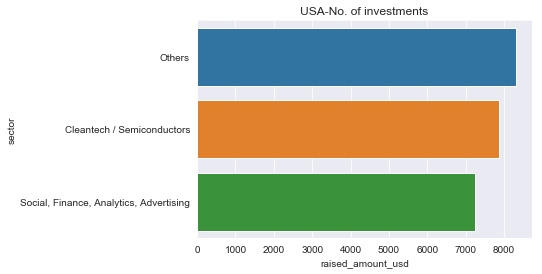

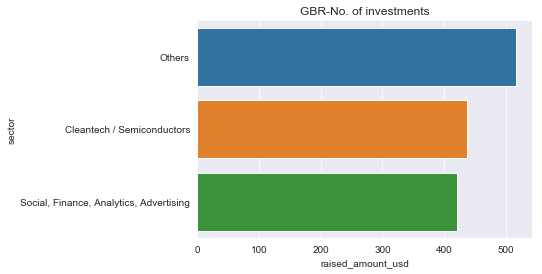

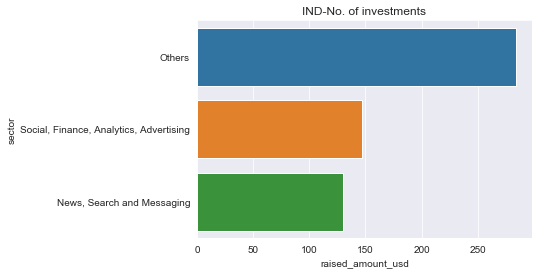

In [310]:
import seaborn as sns
plt.figure(1)

# subplot 1: statistic=mean
plt.subplot(1,1, 1)
usa=sns.barplot(x="raised_amount_usd", y=D1_count_analysis.index, data=D1_count_analysis)
#sns.barplot(x='raised_amount_usd', y='sector', data=D1, estimator=np.count_nonzero, )
plt.title("USA-No. of investments")

# subplot 2: statistic=median
plt.figure(2)
plt.subplot(1, 1, 1)
gbr=sns.barplot(x="raised_amount_usd", y=D2_count_analysis.index, data=D2_count_analysis)
#sns.barplot(x='raised_amount_usd', y='sector', data=D2, estimator=np.count_nonzero)#, order='D2['raised_amount_usd'])
plt.title("GBR-No. of investments")

# subplot 2: statistic=median
plt.figure(3)
plt.subplot(1, 1, 1)
ind=sns.barplot(x="raised_amount_usd", y=D3_count_analysis.index, data=D3_count_analysis)
#sns.barplot(x='raised_amount_usd', y='sector', data=D3, estimator=np.count_nonzero)
plt.title("IND-No. of investments")

plt.show()